In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import csv

In [2]:
import matplotlib.pyplot as plt

In [3]:
path = 'HR_comma_sep.csv'
data = pd.read_csv(path)
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


1. `How does the average satisfaction level change with increasing years of employment? [Line and Scatter Plot]

In [36]:
print(data['satisfaction_level'])
print('............')
print(data.satisfaction_level)

0        0.38
1        0.80
2        0.11
3        0.72
4        0.37
         ... 
14994    0.40
14995    0.37
14996    0.37
14997    0.11
14998    0.37
Name: satisfaction_level, Length: 14999, dtype: float64
............
0        0.38
1        0.80
2        0.11
3        0.72
4        0.37
         ... 
14994    0.40
14995    0.37
14996    0.37
14997    0.11
14998    0.37
Name: satisfaction_level, Length: 14999, dtype: float64


In [5]:
data['satisfaction_level'].head(10)

0    0.38
1    0.80
2    0.11
3    0.72
4    0.37
5    0.41
6    0.10
7    0.92
8    0.89
9    0.42
Name: satisfaction_level, dtype: float64

In [37]:
data_level = data['satisfaction_level']
data_level

0        0.38
1        0.80
2        0.11
3        0.72
4        0.37
         ... 
14994    0.40
14995    0.37
14996    0.37
14997    0.11
14998    0.37
Name: satisfaction_level, Length: 14999, dtype: float64

In [38]:
data_employment = data['time_spend_company']
data_employment

0        3
1        6
2        4
3        5
4        3
        ..
14994    3
14995    3
14996    3
14997    4
14998    3
Name: time_spend_company, Length: 14999, dtype: int64

In [39]:
##1.How does the average satisfaction level change with increasing years of employment? Line
data_hr = data.groupby('time_spend_company').agg({'satisfaction_level':'mean'})
data_hr

,satisfaction_level
time_spend_company,
2,0.697078
3,0.626314
4,0.467517
5,0.610305
6,0.603440
7,0.635957
8,0.665062
10,0.655327


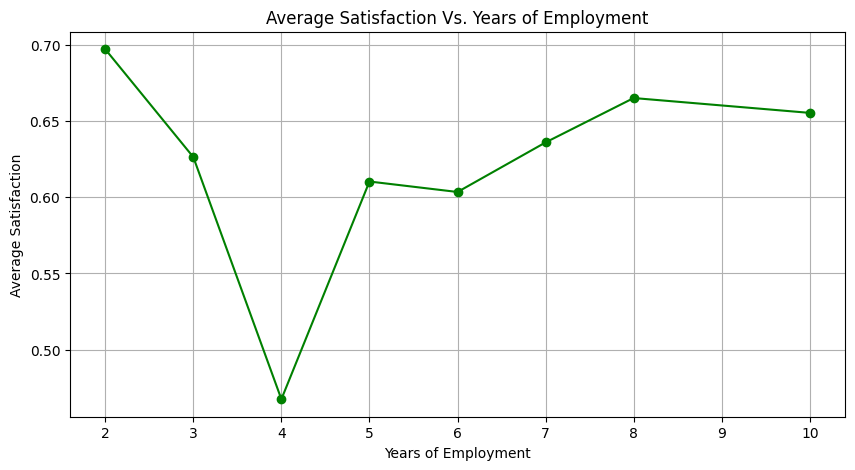

In [40]:
plt.figure(figsize=(10, 5))
plt.plot(data_hr, marker='o', color='g')
plt.title('Average Satisfaction Vs. Years of Employment')
plt.xlabel('Years of Employment')
plt.ylabel('Average Satisfaction')
plt.grid(True)
plt.show()



The graph shows a trend where employee satisfaction initially decreases during the early years of employment, reaching its lowest at 4 years, but then generally increases with further years of employment, stabilizing after 7 years.

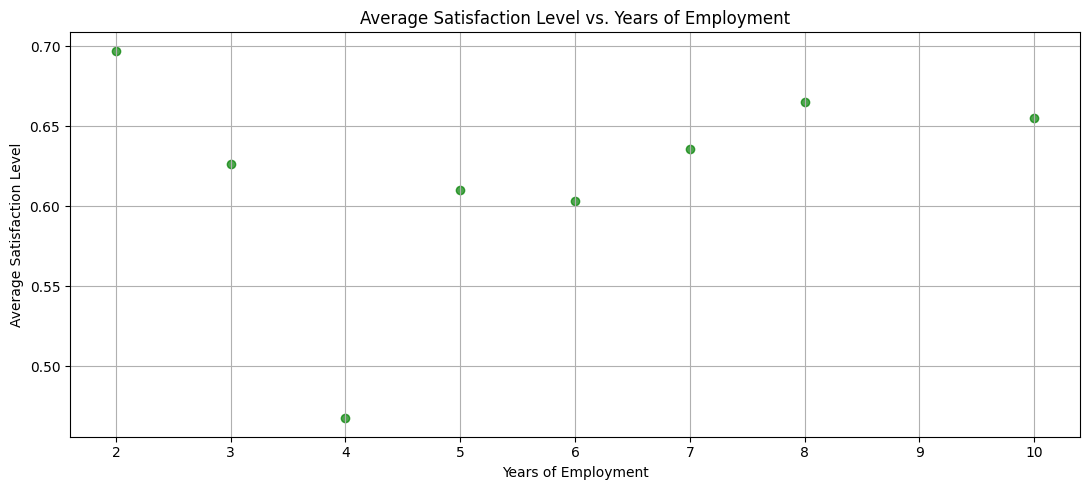

In [15]:
#1. `How does the average satisfaction level change with increasing years of employment? [scatter]
average_satisfaction = data.groupby('time_spend_company')['satisfaction_level'].mean().reset_index()

# Plotting
plt.figure(figsize=(11, 5))

# Scatter plot
plt.scatter(average_satisfaction['time_spend_company'], 
            average_satisfaction['satisfaction_level'], 
            color='green', 
            alpha=0.7)

# Add labels and title
plt.title('Average Satisfaction Level vs. Years of Employment')
plt.xlabel('Years of Employment')
plt.ylabel('Average Satisfaction Level')

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

Employee satisfaction appears lowest at 4 years of employment and highest at 2 and 10 years, suggesting a dip in the mid-phase of employment with higher satisfaction at the beginning and stabilizing again over the long term.

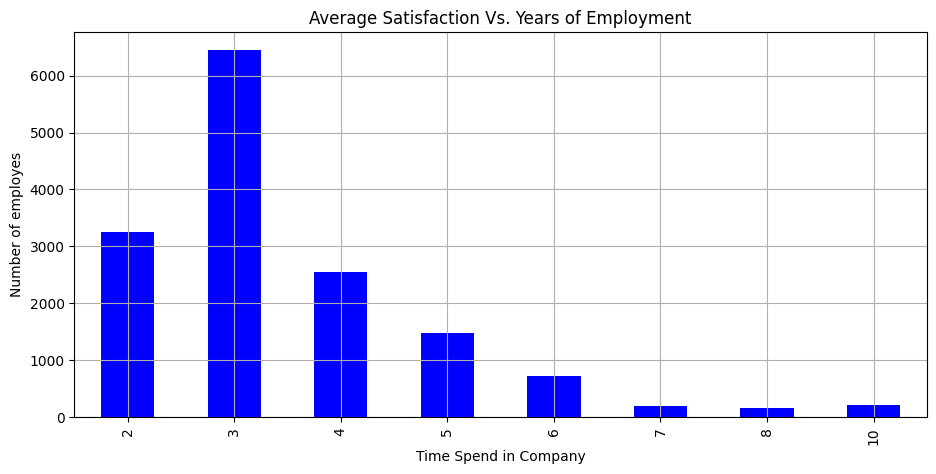

In [17]:
#2.How many employees have spent a specific number of years (time spent in the company)? Bar Plot
plt.figure(figsize=(11, 5))
x =data['time_spend_company'].value_counts().sort_index()
x.plot(kind='bar', color='b')
plt.title('Average Satisfaction Vs. Years of Employment')
plt.xlabel('Time Spend in Company')
plt.ylabel('Number of employes')
plt.grid(True)
plt.show()

The majority of employees have between 2 to 4 years of tenure, with a significant drop in numbers as years of employment increase.

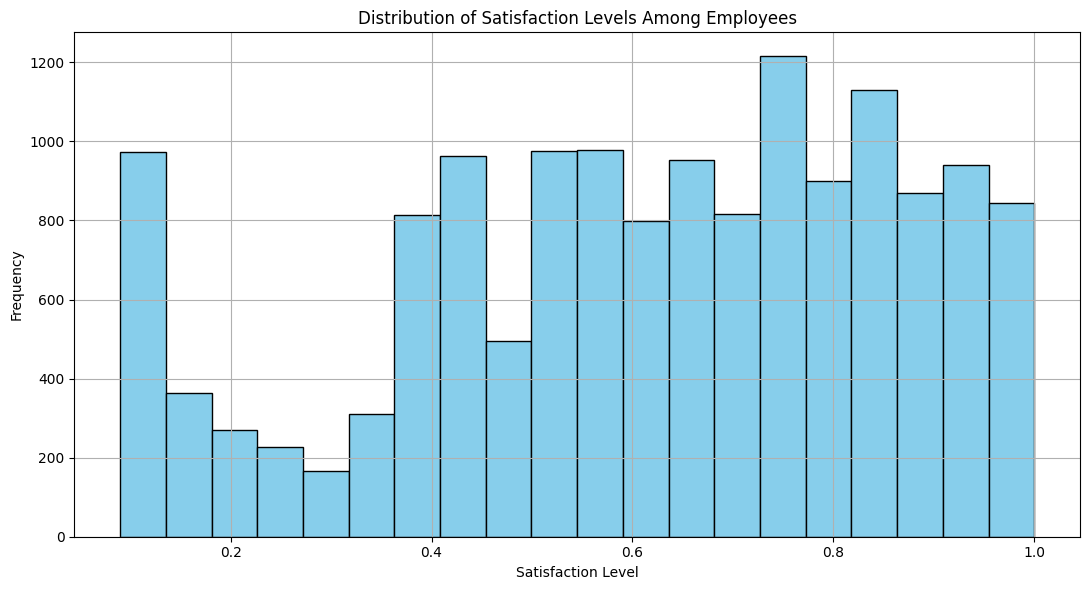

In [41]:
#3.What is the distribution of satisfaction levels among employees? Histogram
plt.figure(figsize=(11, 6))

# Create histogram
plt.hist(data['satisfaction_level'], bins=20, color='skyblue', edgecolor='black')

# Add labels and title
plt.title('Distribution of Satisfaction Levels Among Employees')
plt.xlabel('Satisfaction Level')
plt.ylabel('Frequency')

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()


Employee satisfaction levels are broadly distributed, with peaks in the lower (0.2), middle (0.6), and higher (1.0) satisfaction ranges.

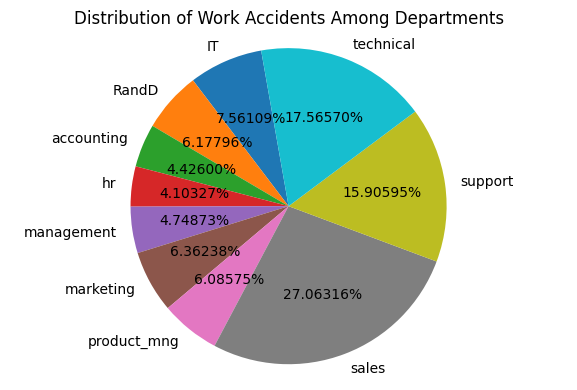

In [47]:
#4.What is the distribution of work accidents among departments? pie plot
work_accidents_by_dept = data.groupby('Department')['Work_accident'].sum()

plt.figure(figsize=(6, 4))

plt.pie(work_accidents_by_dept, labels=work_accidents_by_dept.index, autopct='%1.5f%%', startangle=100)
plt.title('Distribution of Work Accidents Among Departments')
plt.axis('equal')  
plt.tight_layout()
plt.show()

Sales and technical departments have the highest distribution of work accidents, while the management and HR departments have the lowest.

In [24]:
#5.What is the distribution of promotions based on departments?
dis = data.groupby(['Department','promotion_last_5years'])['promotion_last_5years'].count().unstack()
dis

promotion_last_5years,0,1
Department,,
IT,1224.0,3.0
RandD,760.0,27.0
accounting,753.0,14.0
hr,724.0,15.0
management,561.0,69.0
marketing,815.0,43.0
product_mng,902.0,NaN
sales,4040.0,100.0
support,2209.0,20.0


<Figure size 800x600 with 0 Axes>

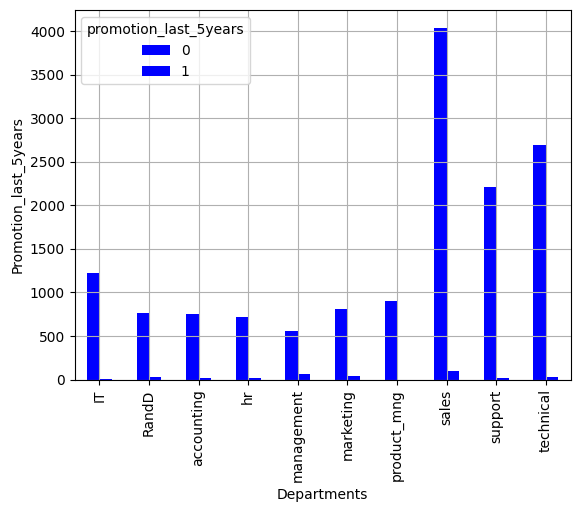

In [50]:
plt.figure(figsize=(8, 6))
dis.plot(kind='bar', color='b')
plt.xlabel('Departments')
plt.ylabel('Promotion_last_5years')
plt.grid(True)
plt.show()

Promotions in the last 5 years have been highest in the sales and technical departments and notably lower in HR and RandD.


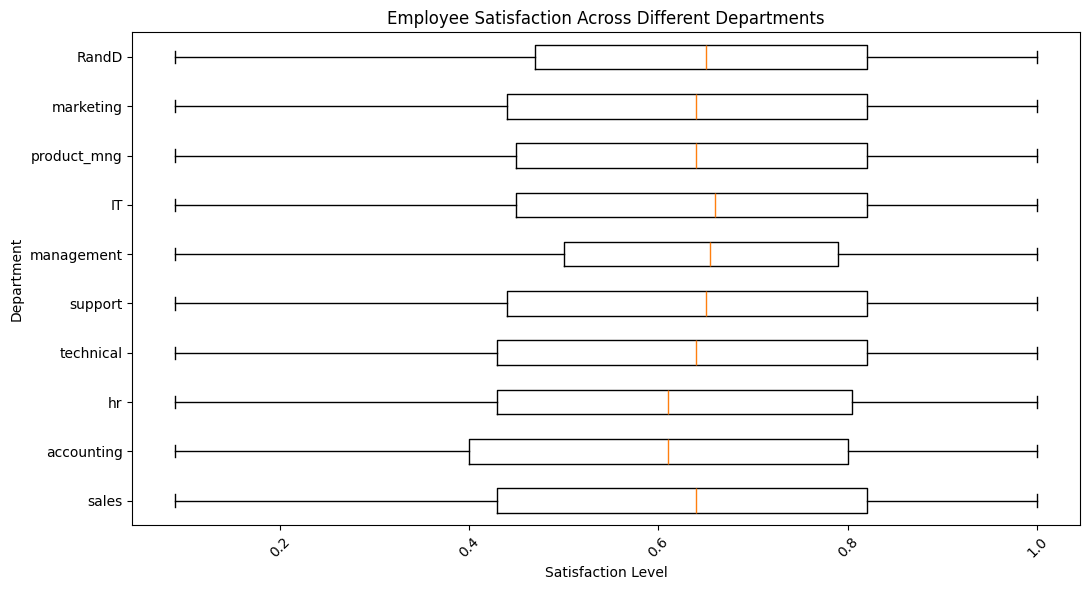

In [29]:
#6.How does employee satisfaction vary across different departments?Box Plot
plt.figure(figsize=(11, 6))
dept_satisfaction = [data[data['Department'] == dept]['satisfaction_level'] for dept in data['Department'].unique()]
plt.boxplot(dept_satisfaction, labels=data['Department'].unique(), vert=False)
plt.title('Employee Satisfaction Across Different Departments')
plt.ylabel('Department')
plt.xlabel('Satisfaction Level')
plt.xticks(rotation=45)  
plt.tight_layout()

plt.show()

The box plot indicates varying satisfaction levels across departments, with the sales department having the widest range indicating significant variability in employee satisfaction, while the RandD department shows a higher median satisfaction with less variability.

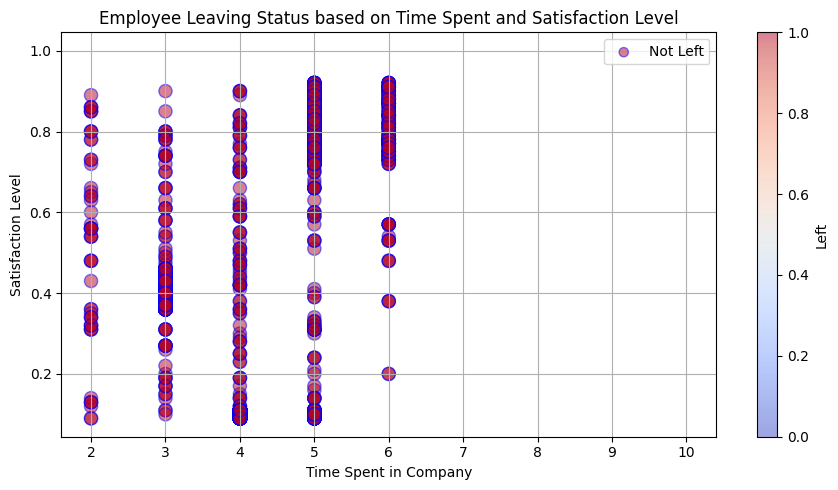

In [54]:
#7. Figure out employee leaving status (time_spend vs satisfaction_level vs left?Bubble Plot
plt.figure(figsize=(9, 5))

# Define bubble plot
plt.scatter(data['time_spend_company'], 
            data['satisfaction_level'], 
            s=data['left']*90, 
            c=data['left'], 
            cmap='coolwarm', 
            alpha=0.5,
            edgecolors='b',
            linewidth=1)


plt.title('Employee Leaving Status based on Time Spent and Satisfaction Level')
plt.xlabel('Time Spent in Company')
plt.ylabel('Satisfaction Level')

plt.legend(['Not Left', 'Left'], loc='upper right')

plt.grid(True)
plt.colorbar(label='Left')
plt.tight_layout()
plt.show()

This scatter plot suggests a higher concentration of employees leaving the company with lower satisfaction levels, particularly evident in those with shorter tenures. High satisfaction levels are more common among those who have not left, across all tenures.

`How many employees have spent a specific number of years (time spent in the company)?`

In [14]:
data_emp = data['time_spend_company']
data_emp.head

<bound method NDFrame.head of 0        3
1        6
2        4
3        5
4        3
        ..
14994    3
14995    3
14996    3
14997    4
14998    3
Name: time_spend_company, Length: 14999, dtype: int64>

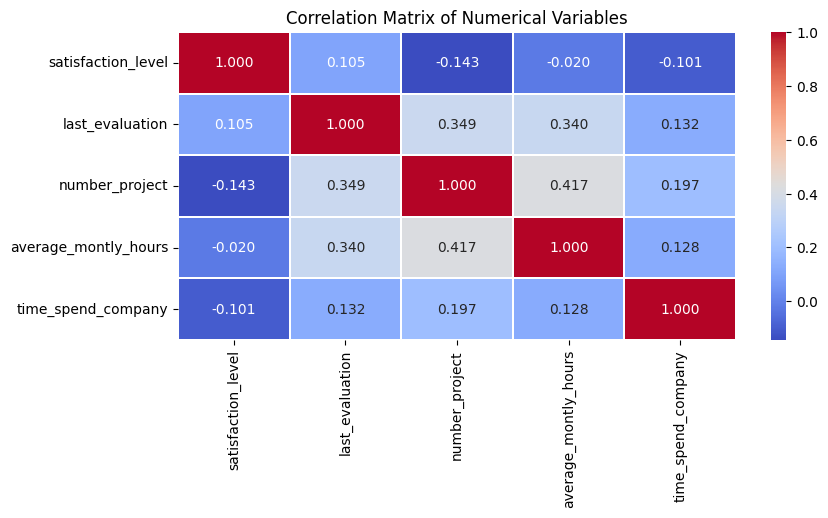

In [57]:
#8.How are the numerical variables correlated with each other?
numerical_data = data[['satisfaction_level', 'last_evaluation', 'number_project', 
                       'average_montly_hours', 'time_spend_company']]

# Calculate correlation matrix
correlation_matrix = numerical_data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(9, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".3f", linewidths=0.3)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

The correlation matrix shows a moderate positive correlation between the number of projects and average monthly hours, while satisfaction level has a slight negative correlation with the number of projects. Time spent at the company has little to no correlation with other variables.

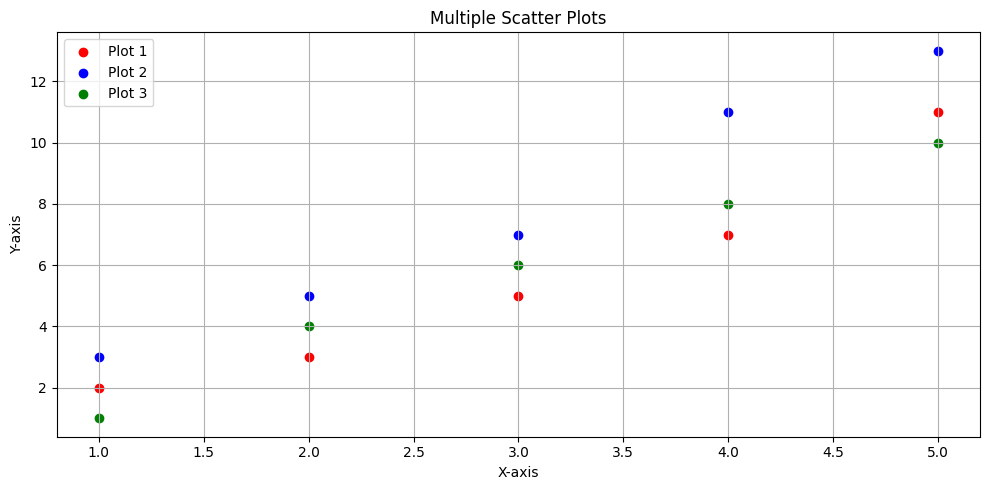

In [58]:
#9.How to create different scatter plots under single matplotlib figure?
x1 = [1, 2, 3, 4, 5]
y1 = [2, 3, 5, 7, 11]

x2 = [1, 2, 3, 4, 5]
y2 = [3, 5, 7, 11, 13]

x3 = [1, 2, 3, 4, 5]
y3 = [1, 4, 6, 8, 10]

plt.figure(figsize=(10, 5))

plt.scatter(x1, y1, color='red', label='Plot 1')
plt.scatter(x2, y2, color='blue', label='Plot 2')
plt.scatter(x3, y3, color='green', label='Plot 3')
plt.legend()

plt.title('Multiple Scatter Plots')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid(True)
plt.tight_layout()
plt.show()


The scatter plots indicate a linear relationship for each of the three datasets, with all three showing an increasing trend where the y-axis values rise as the x-axis values increase. The plots suggest consistency in the rate of increase across the different groups represented.